# Pymaceuticals Inc.
---

### Analysis

- The Capomulin and Ramicane drug regimens were perfomed with more total mice than the other drug regimens.  This increased sample size indicates that the results for these drug regimens may be slightly more representative of the drug's performance than those perfomed with a smaller mice population.  
- Looking at the distribution of female vs. male mice examined throughout this study, it appears to be split evenly with males making up 51% of the total population and females making up the remaining 49%.  As a follow-up to this analysis, it would be beneficial to examine the distribution of female vs. male mice for each drug regimen in order to exclude sex as an influencing factor. 
- Final tumor volume for the Capomulin and Ramican regimens were significantly smaller than the final tumor volumes for the Infubinol and Ceftamin regimens.  Assuming that smaller tumor volume equates to a healthier mouse, this indicates that the Capomulin and Ramican regimens were more effective than the Infubinol and Ceftamin regimens. 
- There is a strong correlation positive correlation (0.84) between mouse weight and average tumor volume for the mice in the Capomulin regimen.  Increased mouse weight correlates to a larger tumor volume. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_count = mouse_results['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = mouse_results.loc[mouse_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep='first'),'Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = mouse_results.loc[mouse_results['Mouse ID'] == 'g989', :]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_mouse_data = mouse_results.drop(mouse_results.loc[mouse_results['Mouse ID'] == 'g989', :].index)
final_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
final_mouse_count = final_mouse_data['Mouse ID'].nunique()
final_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_mouse_data = final_mouse_data.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_volume = grouped_mouse_data['Tumor Volume (mm3)'].mean()
median_volume = grouped_mouse_data['Tumor Volume (mm3)'].median()
volume_variance = grouped_mouse_data['Tumor Volume (mm3)'].var()
std_dev = grouped_mouse_data['Tumor Volume (mm3)'].std()
std_err = grouped_mouse_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
mouse_data_summary = pd.DataFrame({'Mean Tumor Volume': mean_volume, 
                  'Median Tumor Volume': median_volume,
                  'Tumor Volume Variance': volume_variance, 
                  'Tumor Volume Std. Dev.': std_dev, 
                  'Tumor Volume Std. Err.': std_err})
mouse_data_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
ag_data_sumamary = final_mouse_data.groupby('Drug Regimen')[['Tumor Volume (mm3)']].aggregate(['mean', 'median', 'var', 'std', 'sem'])
ag_data_sumamary  

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

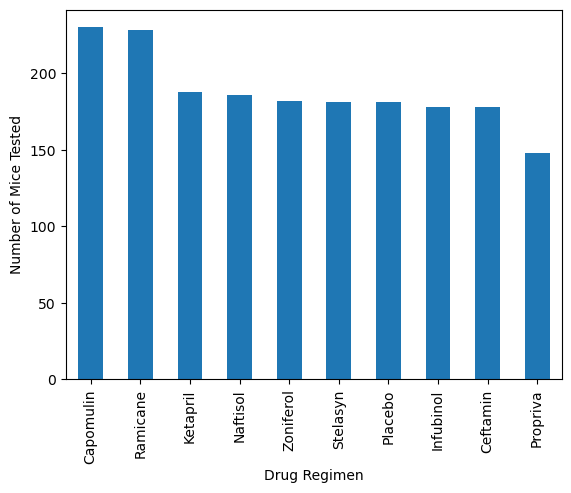

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
number_of_mice = final_mouse_data['Drug Regimen'].value_counts()

pandas_bar = number_of_mice.plot(kind = 'bar', xlabel = 'Drug Regimen', ylabel = 'Number of Mice Tested')

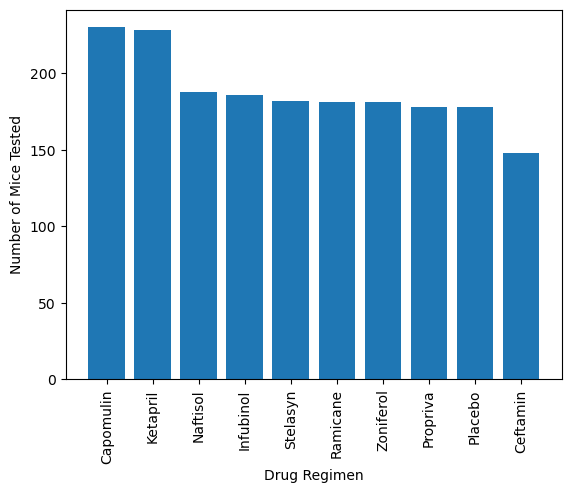

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# If you haven't run the cell above, also run the commented line below:
# number_of_mice = final_mouse_data['Drug Regimen'].value_counts()


pyplot_bar = plt.bar(final_mouse_data['Drug Regimen'].unique(), number_of_mice.values)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation = 'vertical')

plt.show()

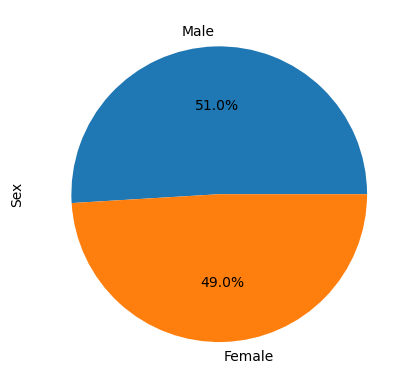

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = final_mouse_data['Sex'].value_counts()

sex.plot( kind='pie', autopct='%1.1f%%')

plt.show()

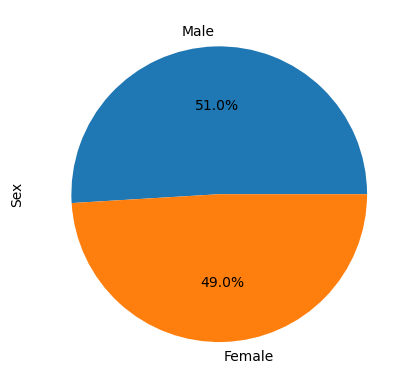

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']

# If you haven't run the cell above, also run the commented line below:
# sex = final_mouse_data['Sex'].value_counts()

plt.pie(sex, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = final_mouse_data.groupby(['Mouse ID']).max()
last_timpoints = last_timepoints.drop(['Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], axis = 1, inplace = True)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_final_mouse_data = last_timepoints.merge(final_mouse_data, on = ['Mouse ID', 'Timepoint'], how = 'left')
merged_final_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_regimens:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    max_tumor_volume = merged_final_mouse_data.loc[merged_final_mouse_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(max_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = max_tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = max_tumor_volume.loc[(max_tumor_volume < lower_bound) | (max_tumor_volume > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers}.")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).


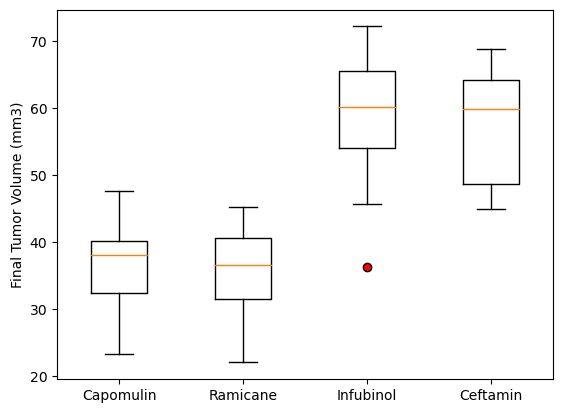

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(markerfacecolor = 'red')

plt.boxplot(tumor_vol_data, labels = treatment_regimens, flierprops = flierprops)

# Label Y axis
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

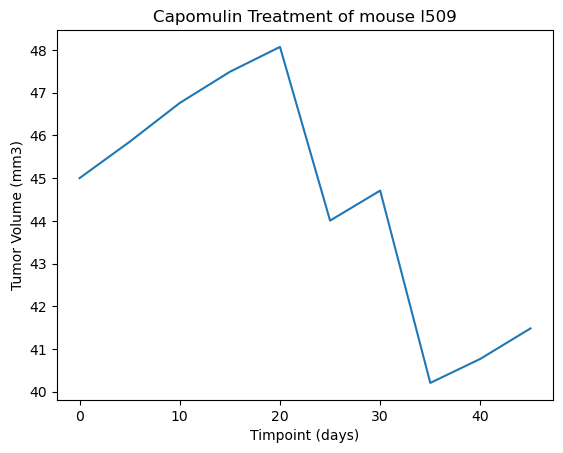

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_l509 = final_mouse_data.loc[final_mouse_data['Mouse ID'] == 'l509', ['Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']]

plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'])

# label title and axes
plt.title('Capomulin Treatment of mouse l509')
plt.xlabel('Timpoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


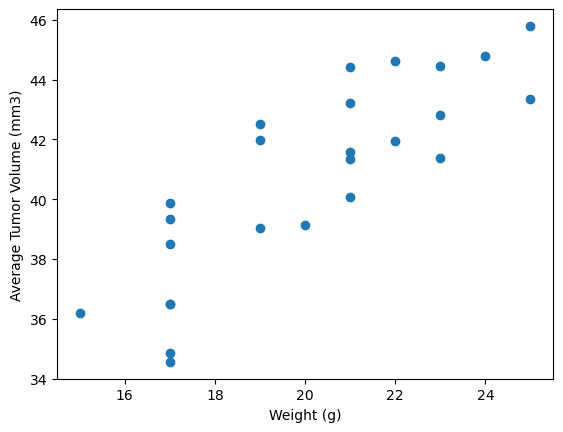

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = final_mouse_data.loc[final_mouse_data['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']]
avg_tumor_volume = capomulin_data.groupby(['Mouse ID']).mean()

plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])

# label axes
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


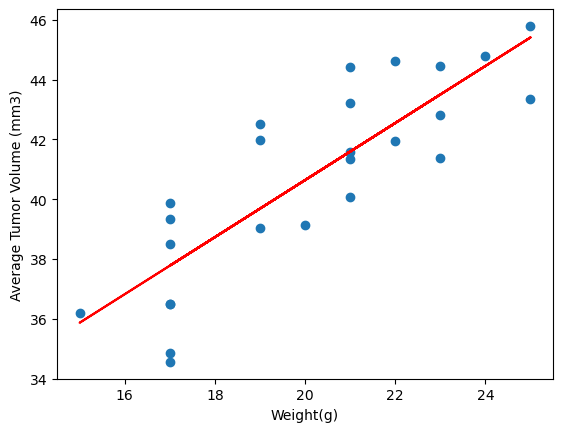

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_tumor_volume['Weight (g)']
y_values = avg_tumor_volume['Tumor Volume (mm3)']

# Determine and print correlation 
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Scatter Plot w/accompanying line of best fit
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# label axes
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()